In [1]:
!pip install XGboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


most of the values of column "Cabin" are NaN, so thats better to remove this column.

In [10]:
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.shape

(891, 11)

Now we have 11 columns. we can inplace NaN values of column "Age" with mean value of this column.

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


<ipython-input-12-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [13]:
df["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [14]:
df['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Now we have no NaN values

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: ylabel='Sex'>

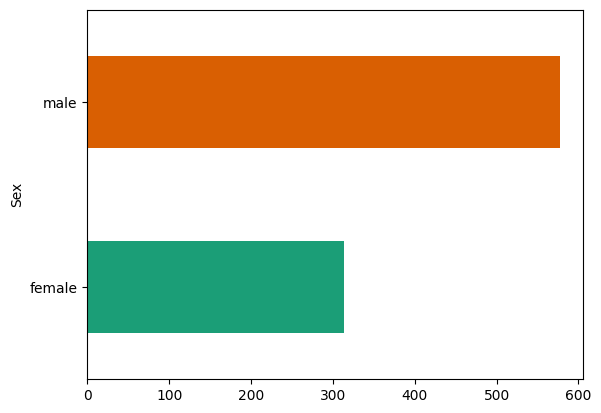

In [18]:
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


In [19]:
def plot_categorical(column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, palette="pastel")
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

<ipython-input-19-f06c509cdccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


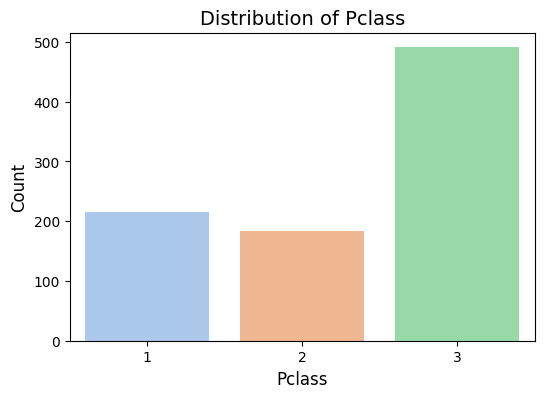

In [20]:
plot_categorical('Pclass')

<ipython-input-19-f06c509cdccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


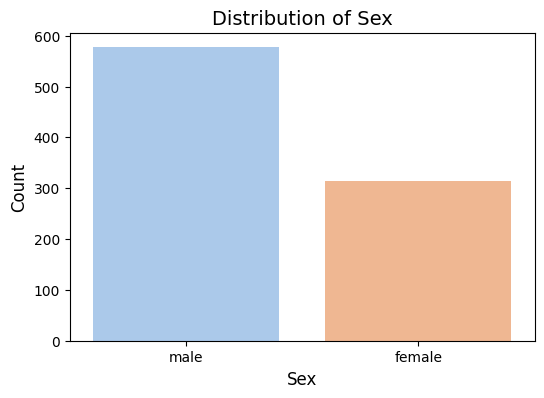

In [21]:
plot_categorical("Sex")

In [22]:
def plot_numerical(column):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

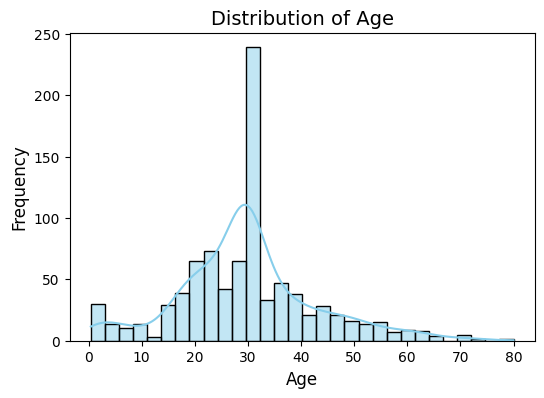

In [23]:
plot_numerical("Age")

<ipython-input-19-f06c509cdccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="pastel")


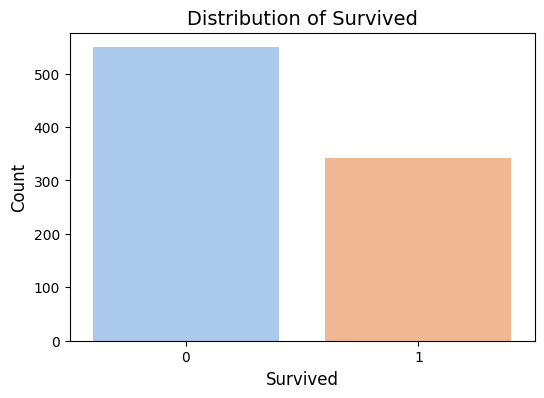

In [24]:
plot_categorical("Survived")

<ipython-input-25-48db63d3d49b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette="pastel", ci=None)
<ipython-input-25-48db63d3d49b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette="pastel", ci=None)


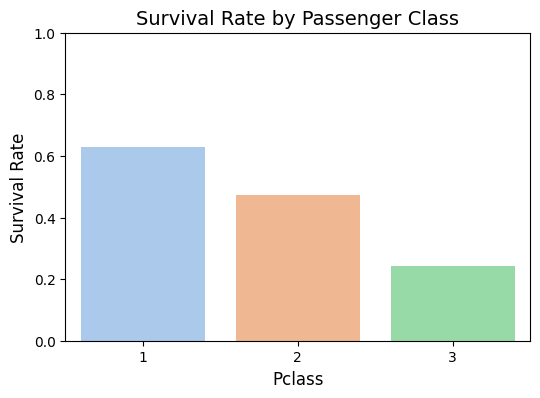

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived', palette="pastel", ci=None)
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.show()

<ipython-input-26-c502658b1472>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette="pastel", ci=None)
<ipython-input-26-c502658b1472>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette="pastel", ci=None)


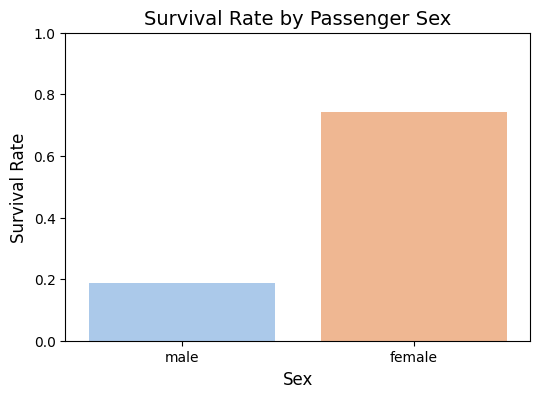

In [26]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived', palette="pastel", ci=None)
plt.title('Survival Rate by Passenger Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.show()

<ipython-input-27-50c5127fc8f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette="pastel")


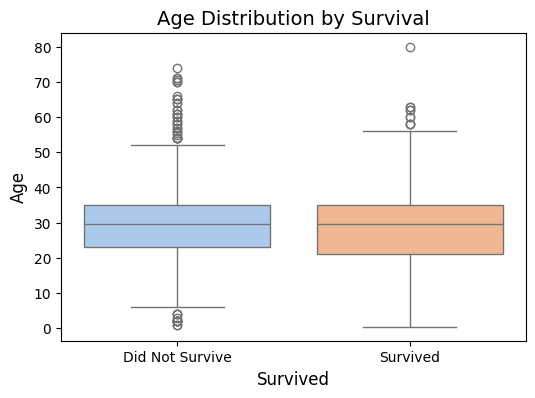

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Survived', y='Age', palette="pastel")
plt.title('Age Distribution by Survival', fontsize=14)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], labels=['Did Not Survive', 'Survived'], fontsize=10)
plt.show()

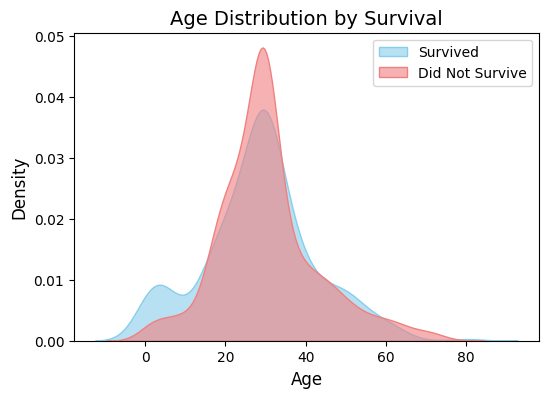

In [28]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, color="skyblue", label="Survived", alpha=0.6)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, color="lightcoral", label="Did Not Survive", alpha=0.6)
plt.title('Age Distribution by Survival', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [29]:
pd.crosstab(df.Sex , df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [30]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
df = pd.get_dummies(df, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Sex'])

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True,False,True


In [33]:
df[['Embarked_Q', 'Embarked_S','Embarked_C',"Sex_female","Sex_male"]] = df[['Embarked_Q', 'Embarked_S','Embarked_C',"Sex_female","Sex_male"]].astype(int)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1


In [35]:
df = df.drop(["PassengerId","Ticket","Name"], axis=1)

In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [37]:
# Features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

In [38]:
#scaling the data


from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the entire DataFrame
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the scaled data
print(X_scaled.head())

     Pclass       Age     SibSp     Parch      Fare  Embarked_C  Embarked_Q  \
0  0.827377 -0.592481  0.432793 -0.473674 -0.502445   -0.482043   -0.307562   
1 -1.566107  0.638789  0.432793 -0.473674  0.786845    2.074505   -0.307562   
2  0.827377 -0.284663 -0.474545 -0.473674 -0.488854   -0.482043   -0.307562   
3 -1.566107  0.407926  0.432793 -0.473674  0.420730   -0.482043   -0.307562   
4  0.827377  0.407926 -0.474545 -0.473674 -0.486337   -0.482043   -0.307562   

   Embarked_S  Sex_female  Sex_male  
0    0.615838   -0.737695  0.737695  
1   -1.623803    1.355574 -1.355574  
2    0.615838    1.355574 -1.355574  
3    0.615838    1.355574 -1.355574  
4    0.615838   -0.737695  0.737695  


In [39]:
#training the data
#Logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Predict on the test set
y_pred = logestic_model.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [44]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[89 16]
 [20 54]]


In [48]:
#KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [50]:
# Predict on the test set
y_pred = knn_regressor.predict(X_test)

In [51]:
# Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.19
R² Score: 0.20


In [52]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [53]:
y_pred = tree_model.predict(X_test)

In [54]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[87 18]
 [18 56]]


In [55]:
#Tunning the model

tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [56]:
y_pred = tree_model.predict(X_test)

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Confusion Matrix:
[[94 11]
 [24 50]]


In [58]:
#Random forest algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Default: 100 trees

# Train the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


In [59]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[92 13]
 [20 54]]


In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8271939328277357


In [61]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=300 , max_depth=10 , min_samples_leaf = 1,
                                  min_samples_split=10 )  # Default: 100 trees


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


In [62]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[94 11]
 [21 53]]


In [63]:
# Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

      Feature  Importance
9    Sex_male    0.221193
8  Sex_female    0.199512
4        Fare    0.185470
1         Age    0.155227
0      Pclass    0.118250
2       SibSp    0.046154
3       Parch    0.035088
7  Embarked_S    0.016160
5  Embarked_C    0.015228
6  Embarked_Q    0.007719


In [64]:
#SVM classifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179

Confusion Matrix:
[[99  6]
 [55 19]]


In [65]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model and find the best parameters
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Accuracy from GridSearchCV:", grid_search.best_score_)

Best Parameters from GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy from GridSearchCV: 0.7892938047867626


In [112]:
svm_model = SVC(random_state=42,C=10,gamma="scale", kernel = "linear")
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix:
[[88 17]
 [22 52]]


In [66]:
#XGboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[90 15]
 [19 55]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}
Best Accuracy: 0.8412784398699891


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:38:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


      Feature  Importance
8  Sex_female    0.542631
0      Pclass    0.196834
2       SibSp    0.069986
4        Fare    0.034496
1         Age    0.034176
7  Embarked_S    0.033401
5  Embarked_C    0.031498
3       Parch    0.030284
6  Embarked_Q    0.026694
9    Sex_male    0.000000


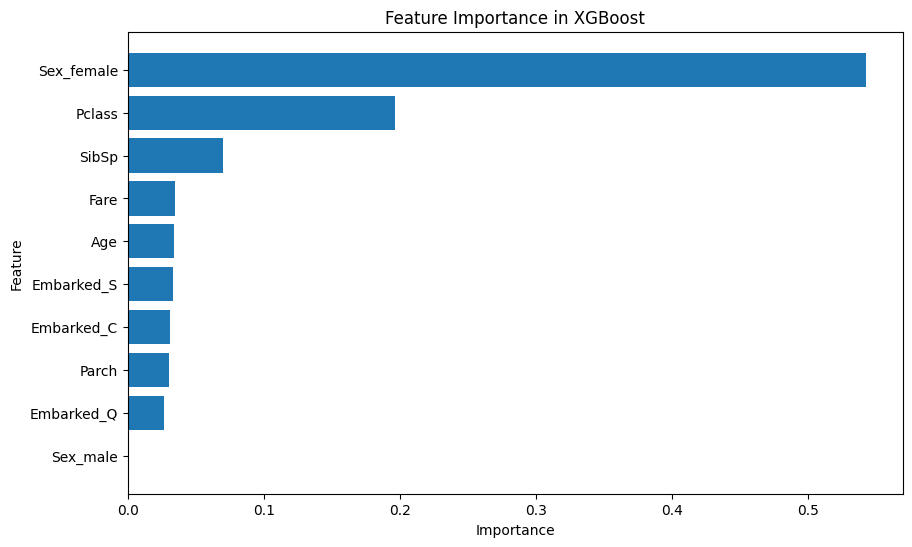

In [69]:
# Extract feature importances

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()
plt.show()


In [70]:
#test file

In [82]:
original_test_df = pd.read_csv("test.csv")

In [83]:
original_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
original_test_df.shape

(418, 11)

In [84]:
test_df= original_test_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [85]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [86]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

<ipython-input-86-8641d0ac01e0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
<ipython-input-86-8641d0ac01e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [87]:
test_df = pd.get_dummies(test_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex'])

In [88]:
test_df[['Embarked_Q', 'Embarked_S','Embarked_C',"Sex_female","Sex_male"]] = test_df[['Embarked_Q', 'Embarked_S','Embarked_C',"Sex_female","Sex_male"]].astype(int)

In [89]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,1
3,3,27.0,0,0,8.6625,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,1,1,0


In [94]:
test_df.shape

(418, 10)

In [96]:
#scaling the data


from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the entire DataFrame
X_test_scaled = scaler.fit_transform(test_df)

# Convert back to a DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_df.columns)

# Check the scaled data
print(X_test_scaled.head())

     Pclass       Age     SibSp     Parch      Fare  Embarked_C  Embarked_Q  \
0  0.873482  0.334993 -0.499470 -0.400248 -0.498407   -0.568142    2.843757   
1  0.873482  1.325530  0.616992 -0.400248 -0.513274   -0.568142   -0.351647   
2 -0.315819  2.514175 -0.499470 -0.400248 -0.465088   -0.568142    2.843757   
3  0.873482 -0.259330 -0.499470 -0.400248 -0.483466   -0.568142   -0.351647   
4  0.873482 -0.655545  0.616992  0.619896 -0.418471   -0.568142   -0.351647   

   Embarked_S  Sex_female  Sex_male  
0   -1.350676   -0.755929  0.755929  
1    0.740370    1.322876 -1.322876  
2   -1.350676   -0.755929  0.755929  
3    0.740370   -0.755929  0.755929  
4    0.740370    1.322876 -1.322876  


In [97]:
X_test_scaled.shape

(418, 10)

Prediction with logestic Regression model

In [98]:
Y_test = logestic_model.predict(X_test_scaled)

In [101]:
logestic_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test
    })

logestic_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1


Prediction with KNN

In [108]:
Y_test2 = knn_regressor.predict(X_test_scaled)

In [109]:
KNN_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test2
    })

KNN_results.head()

,PassengerId,Survived
0,892,0.8
1,893,0.8
2,894,0.8
3,895,0.8
4,896,0.8


Prediction with Decision Tree

In [106]:
Y_test3 = tree_model.predict(X_test_scaled)

In [107]:
DT_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test3
    })

DT_results.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


Prediction wirh Random Forest

In [110]:
Y_test4 = rf_model.predict(X_test_scaled)

In [111]:
RF_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test4
    })

RF_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1


Prediction with SVM

In [114]:
Y_test5 = svm_model.predict(X_test_scaled)

In [115]:
SVM_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test5
    })

SVM_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Prediction with XGBoost

In [116]:
Y_test6 = xgb_model.predict(X_test_scaled)

In [117]:
XGB_results = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': Y_test6
    })

XGB_results.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
